**Dictionary Learning**

**IMPORT RELEVANT LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gzip
import pickle
import time

In [2]:
%matplotlib inline

**LOAD THE MNIST DATASET**

In [3]:
current_path = os.getcwd()

In [4]:
with gzip.open("..\\Dictionary Learning\\mnist_data\\mnist.pkl.gz", mode='rb') as file_content:
    train_set, validation_set, test_set = pickle.load(file=file_content, encoding='latin1')
    file_content.close()

**VIEW THE DATASETS**

*Dataset is already scaled otherwise, it MUST be scaled*

In [5]:
train_set

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, ..., 8, 4, 8], dtype=int64))

In [6]:
validation_set

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([3, 8, 6, ..., 5, 6, 8], dtype=int64))

In [7]:
test_set

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64))

**OBTAIN THE FEATURES AND LABELS FOR EACH DATASETS**

*Train dataset*

In [8]:
X_train, y_train = train_set[0], train_set[1]

In [9]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
y_train

array([5, 0, 4, ..., 8, 4, 8], dtype=int64)

*Validation dataset*

In [11]:
X_validation, y_validation = validation_set[0], validation_set[1]

In [12]:
X_validation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
y_validation

array([3, 8, 6, ..., 5, 6, 8], dtype=int64)

*Test dataset*

In [14]:
X_test, y_test = test_set[0], test_set[1]

In [15]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

**VERIFY THE SHAPE OF THE DATASETS**

*Necessary for understanding the data split during training*

In [17]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_validation: ", X_validation.shape)
print("Shape of y_validation: ", y_validation.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (50000, 784)
Shape of y_train:  (50000,)
Shape of X_validation:  (10000, 784)
Shape of y_validation:  (10000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


**DEFINE THE INDEX NUMBERS FOR THE DATASETS**

In [18]:
train_index = range(0, len(X_train))
validation_index = range(len(X_train), len(X_train)+len(X_validation))
test_index = range(len(X_train)+len(X_validation), len(X_train)+len(X_validation)+len(X_test))

In [19]:
train_index

range(0, 50000)

In [20]:
validation_index

range(50000, 60000)

In [21]:
test_index

range(60000, 70000)

**BUILD THE DATAFRAME FOR EACH OF THE DATASETS**

*Train dataframe*

In [22]:
X_train = pd.DataFrame(data=X_train, index=train_index)
y_train = pd.Series(data=y_train, index=train_index)

In [23]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
49995    5
49996    0
49997    8
49998    4
49999    8
Length: 50000, dtype: int64

*validation dataframe*

In [25]:
X_validation = pd.DataFrame(data=X_validation, index=validation_index)
y_validation = pd.Series(data=y_validation, index=validation_index)

In [26]:
X_validation

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
50000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
y_validation 

50000    3
50001    8
50002    6
50003    9
50004    6
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 10000, dtype: int64

*test dataframe*

In [28]:
X_test = pd.DataFrame(data=X_test, index=test_index)
y_test = pd.Series(data=y_test, index=test_index)

In [29]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
60000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
y_test

60000    7
60001    2
60002    1
60003    0
60004    4
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Length: 10000, dtype: int64

**SCALE THE VARIOUS DATASETS**


*from sklearn.preprocessing import StandardScaler*

*scaler = StandardScaler()*

*our dataset has already been scaled*

**EXPLORE A SAMPLE DATASET**

In [31]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000739,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022778,0.015422,0.012079,0.007217,0.007181,0.001483,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992188,0.992188,0.988281,0.988281,0.992188,0.242188,0.0,0.0,0.0,0.0


In [32]:
X_validation.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001004,0.000314,0.000049,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027335,0.015602,0.002943,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988281,0.988281,0.210938,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000700,0.000639,0.000205,0.000002,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022164,0.022407,0.009454,0.000234,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988281,0.988281,0.609375,0.023438,0.0,0.0,0.0,0.0,0.0,0.0


**DISPLAY AN IMAGE SAMPLE**

*train data*

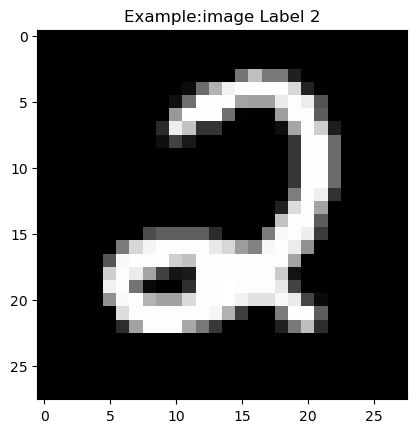

In [34]:
label = y_train.iloc[774]
image = X_train.iloc[774,:].to_numpy().reshape(28, 28)
plt.title(f'Example:image Label {label}')
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.show()

<Axes: >

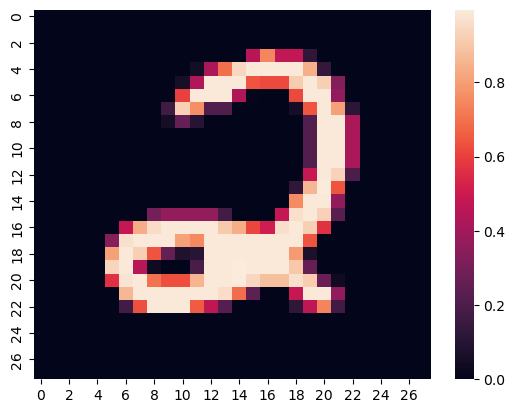

In [35]:
sns.heatmap(data=image, annot=False)

*validation data*

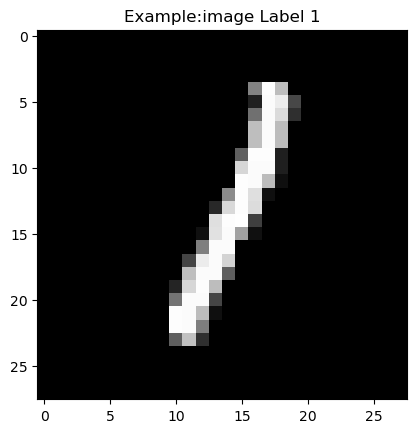

In [36]:
label = y_validation.iloc[400]
image = X_validation.iloc[400,:].to_numpy().reshape(28, 28)
plt.title(f'Example:image Label {label}')
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.show()

<Axes: >

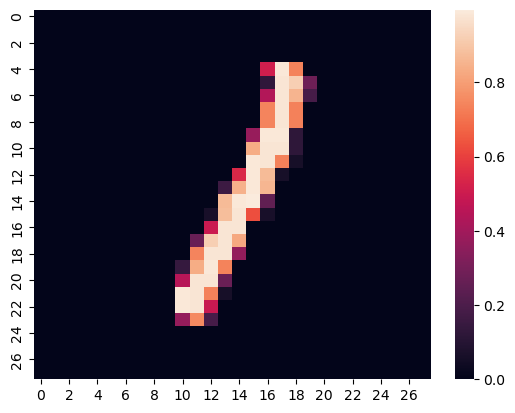

In [37]:
sns.heatmap(data=image, annot=False)

*test  data*

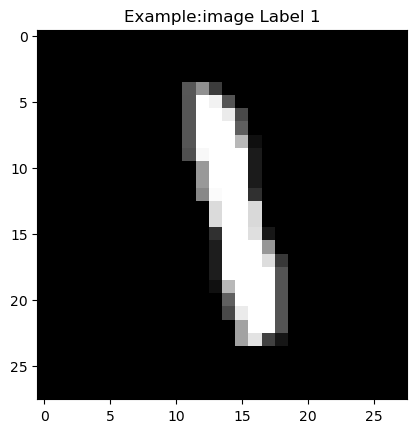

In [38]:
label = y_test.iloc[350]
image = X_test.iloc[350,:].to_numpy().reshape(28, 28)
plt.title(f'Example:image Label {label}')
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.show()

<Axes: >

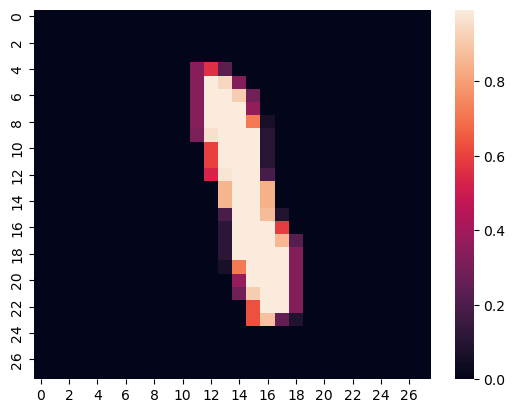

In [39]:
sns.heatmap(data=image, annot=False)

**CREATE THE Dictionary Learning MODEL**

In [40]:
from sklearn.decomposition import MiniBatchDictionaryLearning as MBDL

In [41]:
model = MBDL(n_components=50 , alpha=1, batch_size=200, n_iter=25, random_state=101)

**FIT THE MODEL TO THE VARIOUS DATASET**

*train dataset*

In [43]:
X_train_mbdl = model.fit_transform(X_train.loc[:, :10000])

C:\Users\User\anaconda3\envs\tf\lib\site-packages\sklearn\decomposition\_dict_learning.py:2350: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
C:\Users\User\anaconda3\envs\tf\lib\site-packages\sklearn\decomposition\_dict_learning.py:193: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


In [44]:
X_train_mbdl = pd.DataFrame(data=X_train_mbdl, index=train_index)

In [45]:
X_train_mbdl

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.860175,0.445098,1.919333,-3.553075,2.145793,-0.335318,-2.945935,-4.223770,1.132832,0.983344,...,-1.198289,-2.335508,-0.779065,4.108891,1.150089,0.356942,1.250942,1.486815,-1.064337,0.510623
1,-2.596295,1.523702,0.240467,-0.790077,-2.575219,-1.769479,-0.153896,-1.822005,-2.372033,0.852475,...,-1.383924,-0.114943,0.189223,6.280714,2.981049,-0.945414,-2.596182,-3.712830,0.124787,1.109604
2,-0.572076,-2.872799,-2.179485,0.794782,1.794521,0.840339,-1.797853,0.077753,1.078673,0.471556,...,0.639234,-0.616165,-1.022181,-2.052985,0.171651,0.608714,3.855698,-0.996757,0.634162,1.135063
3,1.401620,0.203239,0.097544,-1.263781,-0.280171,-1.310245,0.143181,4.926585,-0.538682,0.110019,...,-0.452711,-1.996399,-0.914697,-1.024040,4.344442,-0.780432,1.469949,0.141775,0.546205,0.020963
4,-2.221374,-5.248517,2.738168,-0.379252,0.513659,1.043071,0.942339,-0.437468,1.356624,-0.111343,...,-0.205323,1.386465,-2.658285,1.633147,-0.833863,-0.383180,-2.210641,1.090965,-0.121405,0.657910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.247411,-1.834536,2.752933,0.348538,0.511411,-0.863769,-1.108296,-2.436836,1.871151,-0.100910,...,0.903243,0.864713,-0.485979,0.578233,0.831124,1.008092,1.172484,-0.572221,-1.469557,-0.007946
49996,0.362386,2.062922,2.274513,0.048459,0.523789,0.532581,1.524294,-1.204488,0.175200,2.019684,...,-1.836402,-2.230907,-0.245839,2.130399,-0.491930,0.255110,-1.262199,0.685983,-0.855162,2.795250
49997,0.454357,0.273100,2.640868,1.067383,0.740018,1.085011,0.914373,0.192679,2.219524,0.102335,...,1.414047,0.509300,0.238758,-1.404317,1.439509,0.731622,2.148191,1.128397,1.191580,-0.049434
49998,-2.170235,2.391804,-0.470940,2.008614,0.041912,-3.084080,-2.419762,-3.597030,-0.212673,-2.235240,...,0.061623,0.791883,-1.130083,-0.805294,3.480951,2.014613,-4.616125,2.528984,-2.247502,0.361890


*validation data*

In [46]:
X_validation_mbdl = model.transform(X_validation)

C:\Users\User\anaconda3\envs\tf\lib\site-packages\sklearn\decomposition\_dict_learning.py:193: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


In [47]:
X_validation_mbdl = pd.DataFrame(data=X_validation_mbdl, index=validation_index)

In [48]:
X_validation_mbdl

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
50000,5.746751,0.142432,-1.861784,3.717479,-0.296929,2.021515,1.738657,0.634751,1.992347,0.233246,...,-0.051613,1.016603,0.365718,0.476167,0.493104,-2.066365,-0.296637,3.651620,1.639583,0.818020
50001,-5.335207,-0.805998,0.925036,-2.554962,1.260647,-0.287523,0.454067,-0.384628,-0.127385,0.211399,...,0.168182,0.259722,0.171526,3.321198,0.434231,1.087928,1.351940,1.178454,0.070348,-1.058335
50002,4.208066,2.500783,0.347040,0.482357,1.735157,-2.453526,-0.599678,0.457988,-0.335086,-0.146812,...,0.611166,0.025913,1.568338,-0.710519,-0.280946,0.284383,-0.538914,1.114591,1.223916,1.033706
50003,-0.661331,-0.152983,0.126219,2.636322,-0.273770,-0.881909,-1.288315,2.062433,-0.348112,-2.814547,...,-0.160726,1.150221,0.286253,-1.373893,0.680492,-1.604415,-1.332508,1.061781,0.444595,1.350447
50004,-4.663734,0.181530,4.043173,-1.027870,7.468982,-1.406285,-0.137424,-2.109529,0.381574,-1.309893,...,2.231570,-1.495867,-0.287445,0.184890,2.022047,0.949867,0.969813,-0.707551,-0.595601,-1.217796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-5.351143,3.278852,2.235532,0.428763,0.406421,-1.864601,-9.729307,-3.861360,-0.389049,-0.003436,...,2.933837,-1.357233,1.547477,0.323310,2.205484,2.368075,-3.157056,0.863276,-0.948170,0.777400
59996,1.942511,-0.891588,0.340286,-0.428497,-0.928123,-1.173300,-2.652416,0.000000,-1.977798,-1.128969,...,-0.716641,1.946982,0.514533,2.256397,0.561031,0.504626,0.127153,0.434460,0.687211,-1.207862
59997,-2.450897,-1.107955,0.660018,0.294573,2.116445,-0.848748,-2.586493,-0.546177,-0.550163,-0.892603,...,1.595700,-0.589163,-1.134317,-1.640211,0.276760,0.824400,2.915719,1.340518,3.063056,-0.047356
59998,-4.101781,-2.263434,-3.104821,-0.028293,1.280506,2.411656,-1.025225,0.521838,-0.079734,-0.389879,...,0.648256,0.977857,-1.420749,1.220268,0.171251,-1.551897,-0.039336,-0.715672,2.729728,2.662832


**VISUALIZE THE EFFECT OF THE COMPONENT SET VARIANCE FOR EACH DATASET**

In [50]:
def scatter_plot(feature_dataframe, label_dataframe, algorithm_name):
    temp_dataframe = pd.DataFrame(data=feature_dataframe.loc[:, 0:1], index=feature_dataframe.index)
    temp_dataframe = pd.concat((temp_dataframe,label_dataframe), axis=1, join='inner')
    temp_dataframe.columns = ['First Vector', 'Second Vector', 'Label']
    sns.lmplot(x='First Vector', y='Second Vector', hue='Label', data= temp_dataframe, fit_reg=False)
    
    ax = plt.gca()
    ax.set_title(f'Seperation of Observations using {algorithm_name}')

*test data*

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


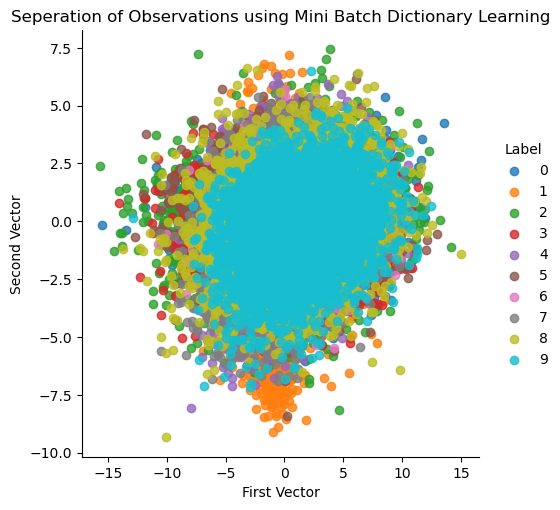

In [53]:
scatter_plot(X_train_mbdl, y_train, 'Mini Batch Dictionary Learning')

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


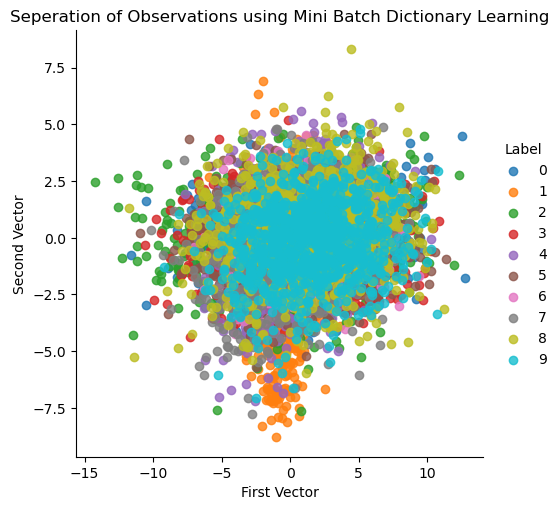

In [54]:
scatter_plot(X_validation_mbdl, y_validation, 'Mini Batch Dictionary Learning')